In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

get_ipython().run_line_magic("matplotlib", "inline")




In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\halos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
api_key = os.getenv("NEWS_API_KEY")

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# here we will pull the newsapi and categories by bitcoin and etherum
# of the latest news headlines regarding Bitcoin and Ethereum 
# to get a better feel for the current public sentiment around each coin.


In [5]:
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
#bitcoin_headlines

In [7]:
#ethereum_articles

In [8]:
bitcoin_sentiments= []

etherium_sentiments = []

In [9]:
# Sentiment calculation based on compound score
for article in bitcoin_headlines["articles"]:
    try: 
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            bitcoin_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            
            
        })
    except AttributeError:
        pass
            

In [10]:
bitcoin_df_sent = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df_sent = bitcoin_df_sent[cols]
bitcoin_df_sent.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833


In [11]:
for article in ethereum_headlines["articles"]:
    try: 
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            etherium_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            
            
        })
        
    except AttributeError:
         pass

In [12]:
etherium_df_sent = pd.DataFrame(etherium_sentiments)
cols_e = ["date", "text", "compound", "positive", "negative", "neutral"]
etherium_df_sent = etherium_df_sent[cols_e]
etherium_df_sent.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954


In [13]:
etherium_df_sent.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.004818,0.065070,0.058830,0.876120
std,0.467353,0.073371,0.068943,0.086147
min,-0.859300,0.000000,0.000000,0.635000
25%,-0.381800,0.000000,0.000000,0.825750
50%,0.000000,0.050500,0.045000,0.877000
75%,0.360575,0.097250,0.085750,0.938000
max,0.862500,0.290000,0.300000,1.000000


In [14]:
bitcoin_df_sent.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,-0.069668,0.055610,0.07075,0.873660
std,0.443882,0.062302,0.07594,0.086781
min,-0.859300,0.000000,0.00000,0.557000
25%,-0.386825,0.000000,0.00000,0.831000
50%,0.000000,0.046000,0.06450,0.874500
75%,0.255800,0.091000,0.10325,0.934250
max,0.817600,0.262000,0.30000,1.000000


In [15]:
# this is the separation for part 2 

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
bitcoin_info = bitcoin_df_sent["text"]
print(bitcoin_info)
#bitcoin_info = bitcoin_df_sent.loc[10,"text"]

0     Now, even though there are a number of women-f...
1     A Bitcoin mining site powered by otherwise los...
2     Warren Buffett has always been a bitcoin skept...
3     Image source, Getty Images\r\nThe value of Bit...
4     As a kid, I remember when my father tried to u...
                            ...                        
95    Warren Buffett and Charlie Munger revealed the...
96    A look at the day ahead in markets from Dhara ...
97    LONDON, May 19 (Reuters) - El Salvador lacks c...
98    Former Bank of Canada governor David Dodge is ...
99    May 10 (Reuters) - Crypto assets bled nearly $...
Name: text, Length: 100, dtype: object


In [19]:
etherium_info = etherium_df_sent["text"]
#etherium_info = etherium_df_sent.loc[10,"text"]
print(etherium_info)


0     Meta has revealed more of how NFTs will work o...
1     GameStop has officially thrown itself headlong...
2     A multi-billion dollar cryptocurrency company ...
3     When Bored Ape Yacht Club creators Yuga Labs a...
4     GameStop is going all-in on crypto. The video ...
                            ...                        
95    NEW YORK (AP) Its been a wild week in crypto, ...
96    Ethereum (ETH) has long played second fiddle t...
97    What happened \r\nAs investors sell off stocks...
98    What happened \r\nThe news in the crypto marke...
99    As the first blockchain with smart-contract fu...
Name: text, Length: 100, dtype: object


In [20]:
#Define preprocess function
def tokenizer(text):
    
    sw = set(stopwords.words('english'))
    
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    
    words = word_tokenize(re_clean)
    
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [21]:
#etherium_data = tokenizer(etherium_info)
#print(etherium_data)

In [22]:
def word_counter(data): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(data)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [23]:
bit_count = word_counter(bitcoin_info)

In [24]:
eth_count = word_counter(etherium_info)

In [25]:
bit_count

,word,count
0,char,93
1,bitcoin,47
2,may,43
3,reuters,37
4,cryptocurrency,36
5,crypto,25
6,ha,25
7,market,20
8,cryptocurrencies,18
9,world,15


In [82]:
bit_string = ' '.join(bit_count['word'])

In [27]:
eth_count

,word,count
0,char,100
1,crypto,34
2,ha,31
3,cryptocurrency,31
4,market,20
5,bitcoin,20
6,may,18
7,wa,14
8,world,14
9,web,13


In [28]:
def bigram_counter(data): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(data)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [29]:
bit_gram = bigram_counter(bitcoin_info)


In [30]:
eth_gram = bigram_counter(etherium_info)

In [31]:
bit_gram

,bigram,count
0,"(may, reuters)",37
1,"(char, may)",12
2,"(char, posted)",7
3,"(kong, may)",6
4,"(digital, currency)",6
5,"(reuters, bitcoin)",5
6,"(world, biggest)",5
7,"(hong, kong)",5
8,"(record, losing)",4
9,"(losing, streak)",4


In [84]:
eth_string = ' '.join(eth_count['word'])

In [32]:
eth_gram

,bigram,count
0,"(may, reuters)",10
1,"(char, may)",7
2,"(last, week)",7
3,"(crypto, market)",6
4,"(char, cryptocurrency)",5
5,"(yacht, club)",4
6,"(reuters, bitcoin)",4
7,"(world, biggest)",4
8,"(bitcoin, ethereum)",3
9,"(previous, closebitcoin)",3


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

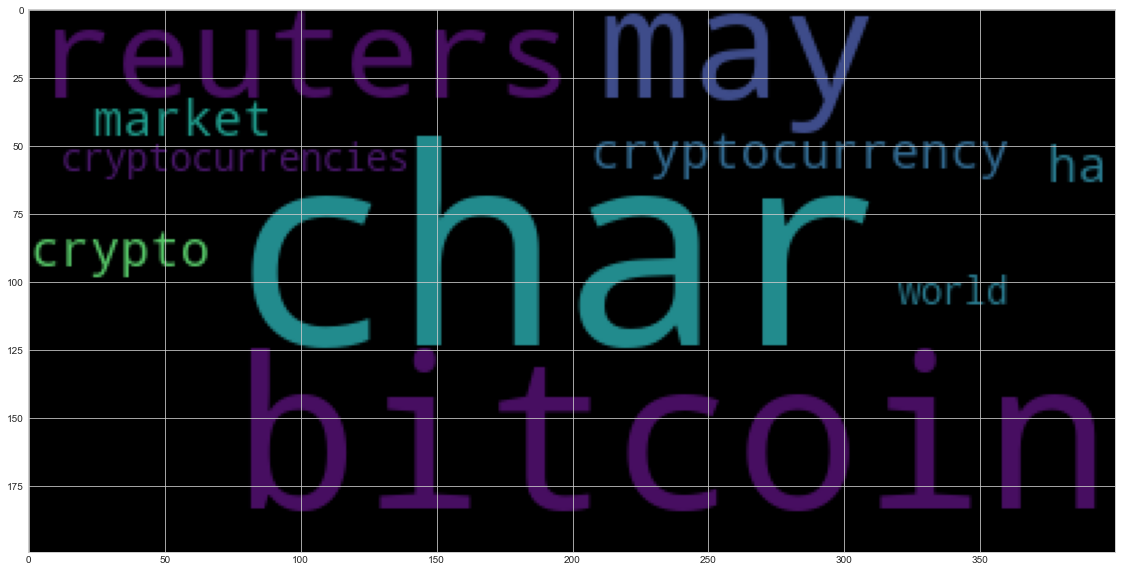

In [83]:
bit_wc = WordCloud().generate(bit_string)
plt.imshow(bit_wc)

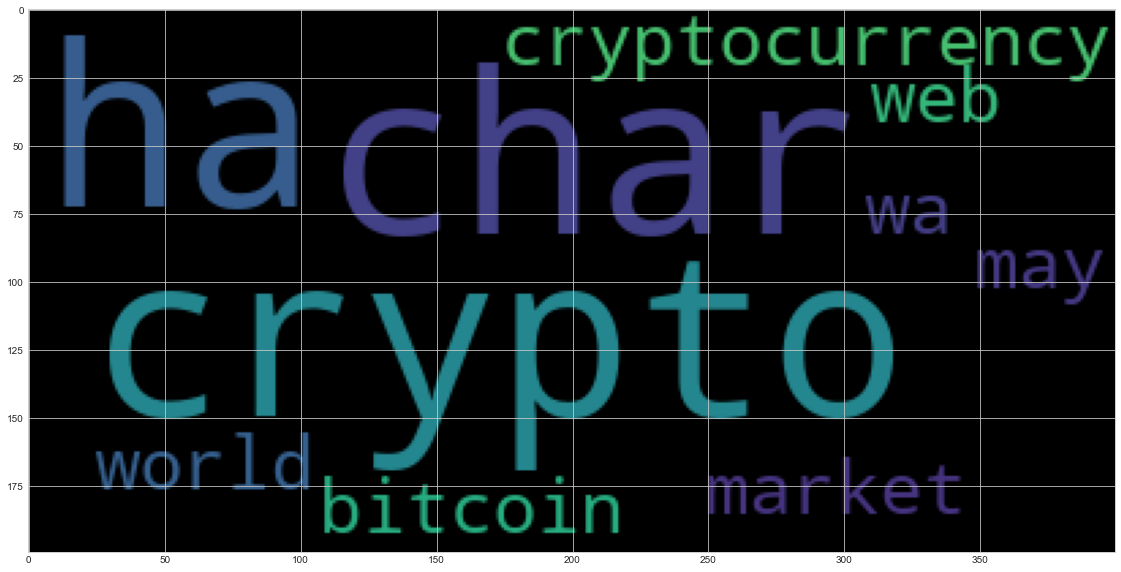

In [86]:
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

In [ ]:
# Separation for Part 3 named entity recognition

In [37]:
import spacy 
from spacy import displacy 

In [38]:
nlp = spacy.load('en_core_web_sm')

In [39]:
bitcoin_df_vis = pd.DataFrame(bitcoin_info, dtype='string')

bitcoin_df_vis.head()


,text
0,"Now, even though there are a number of women-f..."
1,A Bitcoin mining site powered by otherwise los...
2,Warren Buffett has always been a bitcoin skept...
3,"Image source, Getty Images The value of Bitco..."
4,"As a kid, I remember when my father tried to u..."


In [40]:
bitcoin_txt = bitcoin_df_vis['text'].to_string()


print(bitcoin_txt)

0     Now, even though there are a number of women-f...
1     A Bitcoin mining site powered by otherwise los...
2     Warren Buffett has always been a bitcoin skept...
3     Image source, Getty Images
The value of Bitco...
4     As a kid, I remember when my father tried to u...
5     If youve ever felt like introducing some Vegas...
6     Cryptocurrency mixers are sometimes used to he...
7     Photo Illustration by Grayson Blackmon / The V...
8     Posted 
From Bitcoin's dramatic drop to a new...
9     May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...
10    May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...
11    May 9 (Reuters) - Bitcoin dropped 7.81% to $31...
12    BTC fell to its lowest level since last July, ...
13    At a Mexican restaurant in North London a few ...
14    May 24 (Reuters) - The crypto winter is into i...
15    May 10 (Reuters) - Bitcoin has scant experienc...
16    Terra is launching a new blockchain with a new...
17    After two linked cryptocurrencies collapsed 

In [41]:
etherium_df_vis = pd.DataFrame(etherium_info, dtype='string')

etherium_df_vis.head()

,text
0,Meta has revealed more of how NFTs will work o...
1,GameStop has officially thrown itself headlong...
2,A multi-billion dollar cryptocurrency company ...
3,When Bored Ape Yacht Club creators Yuga Labs a...
4,GameStop is going all-in on crypto. The video ...


In [42]:
etherium_txt = etherium_df_vis['text'].to_string()

print(etherium_txt)

0     Meta has revealed more of how NFTs will work o...
1     GameStop has officially thrown itself headlong...
2     A multi-billion dollar cryptocurrency company ...
3     When Bored Ape Yacht Club creators Yuga Labs a...
4     GameStop is going all-in on crypto. The video ...
5     DAVOS, Switzerland, May 25 (Reuters) - Ethereu...
6     There's a new metaverse project from the creat...
7     Editorial IndependenceWe want to help you make...
8     40 days ago Bitcoin sold for $47,454. It's pri...
9     When Nvidia launched its Ampere Lite Hash Rate...
10    May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...
11    May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...
12    May 9 (Reuters) - Bitcoin dropped 7.81% to $31...
13    9 with 8 posters participating
Nvidia began r...
14    If you ever wanted to buy an NFT based on Ethe...
15    BTC fell to its lowest level since last July, ...
16    The cryptocurrency boom over the past few year...
17    ApeCoin, the native cryptocurrency of the A

In [43]:
bit_doc = nlp(bitcoin_txt)

In [44]:
# Render NER visualization with displacy to determine entities for extraction
displacy.render(bit_doc, style='ent')

In [76]:
entities=[ent.text for ent in bit_doc if ent.text == ['GPE','Person','Money']]

In [87]:
doc_eth =  nlp(etherium_txt)

In [88]:
# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc_eth, style='ent')

SyntaxError: invalid syntax (Temp/ipykernel_12180/1294204465.py, line 1)